In [1]:
%load_ext autoreload
%autoreload 2

bike-packing True
49


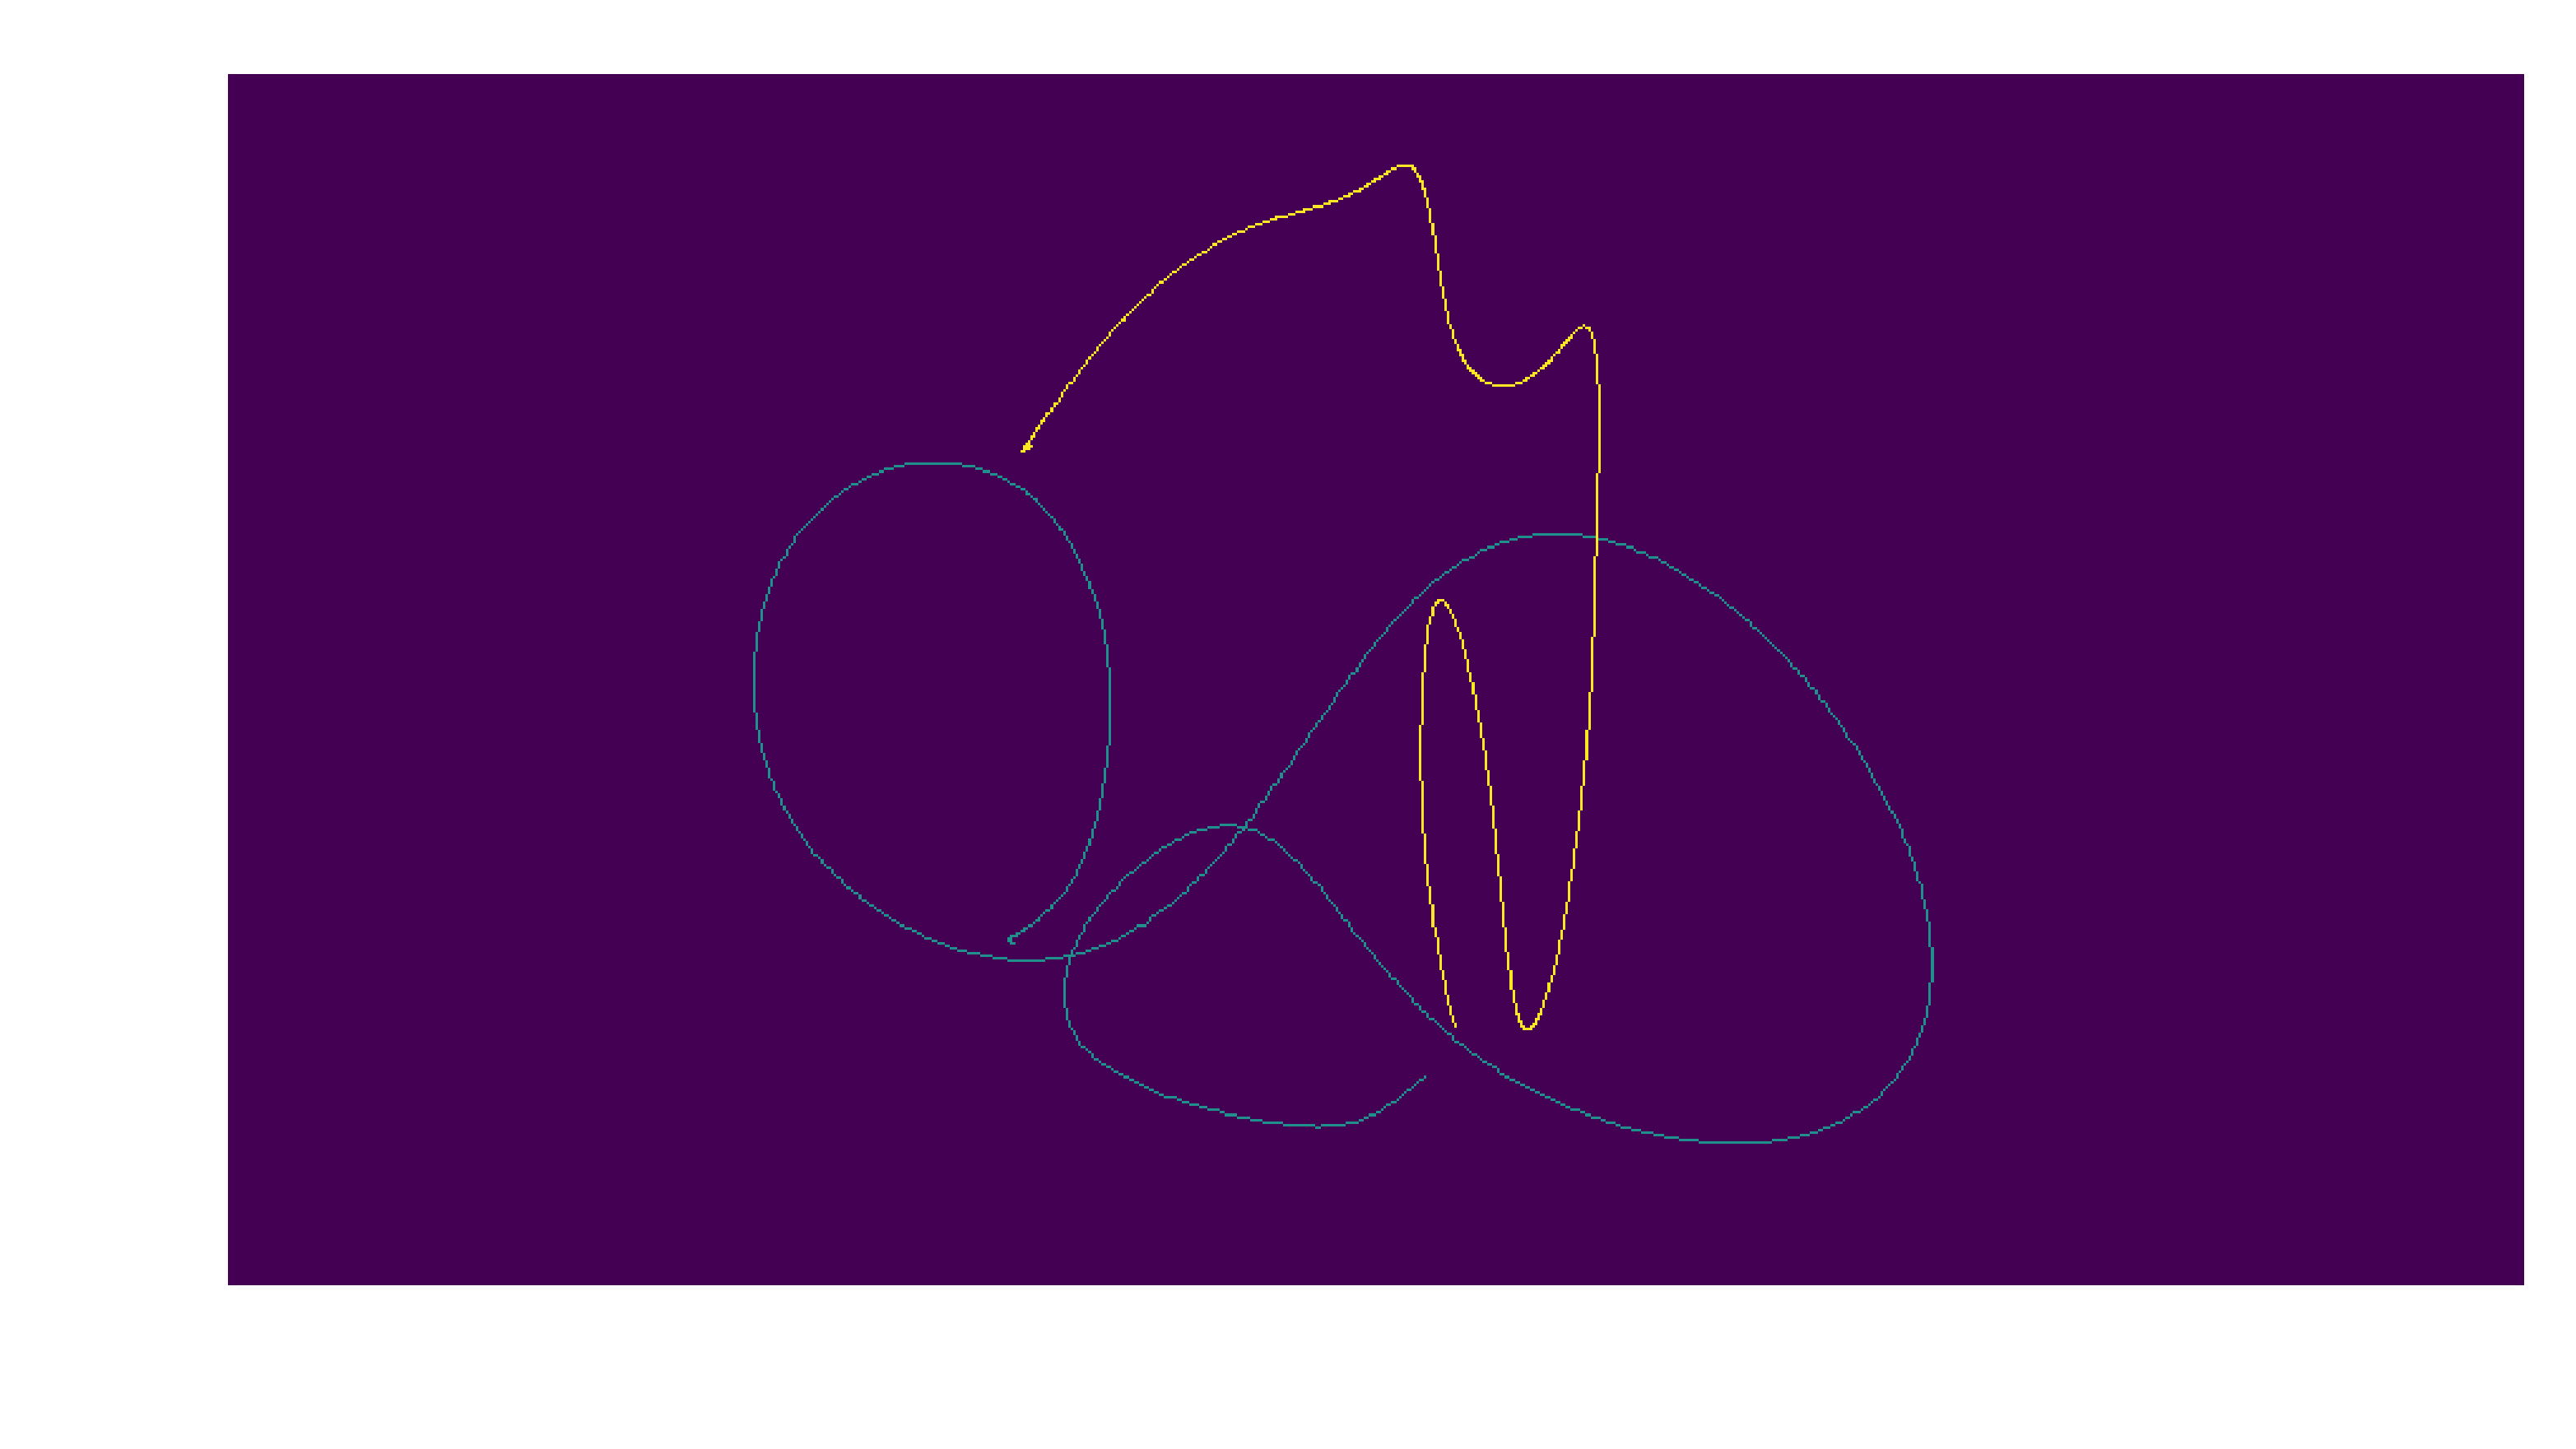

In [11]:
from davisinteractive.client import DavisInteractiveSession
from davisinteractive.dataset import Davis
from davisinteractive.utils.scribbles import scribbles2mask

import matplotlib.pyplot as plt
%matplotlib inline

davis_root = '/Users/alberto/Workspace/CVL/datasets/davis-2017/data/DAVIS/'
davis = Davis(davis_root)

def model(sequence, scribbles):
    seq_info = davis.dataset['sequences'][sequence]
    img_size = tuple(seq_info['image_size'][::-1])
    
    masks = scribbles2mask(scribbles, img_size, default_value=0, bezier_curve_sampling=True, bresenham_=True)
    return masks

with DavisInteractiveSession(host='localhost', davis_root=davis_root, 
                             subset='val', max_time=None, max_nb_interactions=3) as sess:
    count = 15
    while sess.is_running() and count:
        sequence, scribbles, new_sequence = sess.get_scribbles(only_last=False)
        print(sequence, new_sequence)
        
        annotated_frame = scribbles['annotated_frame']
        print(annotated_frame)
        masks = model(sequence, scribbles)
        
        plt.figure(dpi=600)
        plt.imshow(masks[annotated_frame])
        plt.axis('off')
        plt.show()
        
        sess.submit_masks(masks)
        count -= 1
        break

    df = sess.get_report()

In [10]:
df

,sequence,scribble_idx,interaction,object_id,frame,jaccard,timming
0,bike-packing,1,1,0,0,0.000000,0.273605
1,bike-packing,1,1,1,0,0.000000,0.273605
2,bike-packing,1,1,0,1,0.000000,0.273605
3,bike-packing,1,1,1,1,0.000000,0.273605
4,bike-packing,1,1,0,2,0.000000,0.273605
5,bike-packing,1,1,1,2,0.000000,0.273605
6,bike-packing,1,1,0,3,0.000000,0.273605
7,bike-packing,1,1,1,3,0.000000,0.273605
8,bike-packing,1,1,0,4,0.000000,0.273605
9,bike-packing,1,1,1,4,0.000000,0.273605


In [9]:
df.groupby(['sequence', 'scribble_idx', 'interaction', 'object_id']).mean()

jaccard   timming
sequence     scribble_idx interaction object_id                    
bike-packing 1            1           0          0.000244  0.273605
                                      1          0.000265  0.273605
                          2           0          0.000323  0.424777
                                      1          0.000366  0.424777
                          3           0          0.000405  0.545548
                                      1          0.000487  0.545548
             2            1           0          0.000400  0.463706
                                      1          0.000344  0.463706
                          2           0          0.000478  0.569399
                                      1          0.000446  0.569399
                          3           0          0.000561  0.681096
                                      1          0.000566  0.681096
             3            1           0          0.000802  0.580286
                                      1          0.000555  0.580286
                          2           0          0.000880  0.695245
                                      1          0.000656  0.695245
                          3           0          0.000963  0.821850
                                      1          0.000777  0.821850
blackswan    1            1           0          0.000403  0.190968
                          2           0          0.000588  0.254786
                          3           0          0.000780  0.391503
             2            1           0          0.000286  0.206682
                          2           0          0.000471  0.269874
                          3           0          0.000663  0.431432

In [4]:
import numpy as np

nb_frames= 60
nb_objects = 3

frames_idx = np.arange(nb_frames)
objects_idx = np.arange(nb_objects)

O, F = np.meshgrid(objects_idx, frames_idx)
F.ravel(), O.ravel()

(array([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,
         5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11,
        11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16,
        17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22,
        22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28,
        28, 28, 29, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33,
        34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 37, 38, 38, 38, 39, 39,
        39, 40, 40, 40, 41, 41, 41, 42, 42, 42, 43, 43, 43, 44, 44, 44, 45,
        45, 45, 46, 46, 46, 47, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50,
        51, 51, 51, 52, 52, 52, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56,
        56, 57, 57, 57, 58, 58, 58, 59, 59, 59]),
 array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
        1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1,
        2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1